## Import and Organize Flight Delay Data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flight_df1 = pd.read_csv('1024041396_T_ONTIME.csv')

In [3]:
flight_df2 = pd.read_csv('1019340177_T_ONTIME.csv')

In [4]:
flight_df3 = pd.read_csv('1019340177_T_ONTIME 2.csv')

In [5]:
flight_df1.head(2)

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,...,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 21
0,2016-06-01,AA,19805,12478,JFK,"New York, NY",NY,12892,LAX,"Los Angeles, CA",...,0.0,-33.0,0.0,0.0,347.0,1.0,2475.0,NaN,NaN,NaN
1,2016-06-01,AA,19805,12892,LAX,"Los Angeles, CA",CA,12478,JFK,"New York, NY",...,0.0,-5.0,0.0,0.0,335.0,1.0,2475.0,NaN,NaN,NaN


In [6]:
airline_lookup = pd.read_csv('L_UNIQUE_CARRIERS.csv')
#Import airline names for identification

In [7]:
airline_lookup.columns = ['UNIQUE_CARRIER', 'airline_name']
airline_lookup.columns

Index(['UNIQUE_CARRIER', 'airline_name'], dtype='object')

In [8]:
flight_df1.columns

Index(['FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID', 'ORIGIN_AIRPORT_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'ACTUAL_ELAPSED_TIME', 'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'Unnamed: 21'],
      dtype='object')

In [9]:
frames = [flight_df1, flight_df2, flight_df3]

In [11]:
flight_df1 = pd.concat(frames)
len(flight_df1)

1428625

In [12]:
flight_df1 = pd.merge(airline_lookup, flight_df1, on='UNIQUE_CARRIER')

In [13]:
#sum(flight_df1['airline_name_y'].value_counts())
flight_df1.columns

Index(['UNIQUE_CARRIER', 'airline_name', 'FL_DATE', 'AIRLINE_ID',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'ARR_DELAY', 'ARR_DELAY_NEW', 'CANCELLED',
       'ACTUAL_ELAPSED_TIME', 'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'Unnamed: 21'],
      dtype='object')

In [14]:
#df.drop('column_name', axis=1, inplace=True)
#flight_df1.drop('airline_name_y', axis=1, inplace=True)

In [15]:
flight_no_nan = flight_df1.replace(np.nan, 0)

In [16]:
flight_no_nan.head()

,UNIQUE_CARRIER,airline_name,FL_DATE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,Unnamed: 21
0,AA,American Airlines Inc.,2016-06-01,19805,12478,JFK,"New York, NY",NY,12892,LAX,...,0.0,-33.0,0.0,0.0,347.0,1.0,2475.0,0.0,0.0,0.0
1,AA,American Airlines Inc.,2016-06-01,19805,12892,LAX,"Los Angeles, CA",CA,12478,JFK,...,0.0,-5.0,0.0,0.0,335.0,1.0,2475.0,0.0,0.0,0.0
2,AA,American Airlines Inc.,2016-06-01,19805,12478,JFK,"New York, NY",NY,12892,LAX,...,66.0,32.0,32.0,0.0,336.0,1.0,2475.0,32.0,0.0,0.0
3,AA,American Airlines Inc.,2016-06-01,19805,12892,LAX,"Los Angeles, CA",CA,12478,JFK,...,0.0,-14.0,0.0,0.0,332.0,1.0,2475.0,0.0,0.0,0.0
4,AA,American Airlines Inc.,2016-06-01,19805,11298,DFW,"Dallas/Fort Worth, TX",TX,12173,HNL,...,35.0,11.0,11.0,0.0,492.0,1.0,3784.0,0.0,0.0,0.0


In [17]:
sum(flight_no_nan['FLIGHTS'])

1428625.0

In [18]:
#departure delay minutes by airline
dep_delay_totals = flight_no_nan.groupby(['UNIQUE_CARRIER'])['DEP_DELAY'].sum()
dep_delay_averages= flight_no_nan.groupby(['UNIQUE_CARRIER'])['DEP_DELAY'].mean()
dep_delay_var= flight_no_nan.groupby(['UNIQUE_CARRIER'])['DEP_DELAY'].var()

In [19]:
#arrival delays and averages
arr_delay_totals = flight_no_nan.groupby(['UNIQUE_CARRIER'])['ARR_DELAY'].sum()
arr_delay_averages = flight_no_nan.groupby(['UNIQUE_CARRIER'])['ARR_DELAY'].mean()
arr_delay_var = flight_no_nan.groupby(['UNIQUE_CARRIER'])['ARR_DELAY'].var()

In [20]:
#total delay minutes by airline
weather_del_tot = flight_no_nan.groupby(['UNIQUE_CARRIER'])['WEATHER_DELAY'].sum()
carrier_del_tot = flight_no_nan.groupby(['UNIQUE_CARRIER'])['CARRIER_DELAY'].sum()

In [21]:
#total number of flights by airline
tot_flights = flight_no_nan.groupby(['UNIQUE_CARRIER'])['FLIGHTS'].sum()

In [22]:
#total number of cancellations by airline
tot_canc = flight_no_nan.groupby(['UNIQUE_CARRIER'])['CANCELLED'].sum()

In [23]:
len(flight_df1.columns)

23

## Analysis of Routes

In [24]:
origin_destination = flight_df1[['UNIQUE_CARRIER', 'airline_name', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
                                 'DEST_CITY_NAME', 'DISTANCE', 'WEATHER_DELAY', 'CARRIER_DELAY', 'FLIGHTS']]

In [25]:
origin_destination['total_delay'] = origin_destination['WEATHER_DELAY'].radd(origin_destination['CARRIER_DELAY'])

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
# origin_destination.head()

In [27]:
origin_destination.replace(np.nan, 0, inplace = True)

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
cancellations = flight_df1.groupby(['UNIQUE_CARRIER'])['CANCELLED'].sum()
#cancellations

In [29]:
carrier_delay = flight_df1.groupby(['UNIQUE_CARRIER'])['CARRIER_DELAY'].sum()
#carrier delay

In [30]:
weather_delay = flight_df1.groupby(['UNIQUE_CARRIER'])['WEATHER_DELAY'].sum()
#weather_delay

In [31]:
# origin_destination['airport_routes'] = origin_destination[['ORIGIN', 'DEST']].apply(tuple, axis=1)
# origin_destination['city_routes'] = origin_destination[['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']].apply(tuple, axis=1)

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
origin_destination['airport_routes'] = origin_destination.loc[:,('ORIGIN', 'DEST')].apply(tuple, axis=1)
origin_destination['city_routes'] = origin_destination.loc[:,('ORIGIN_CITY_NAME', 'DEST_CITY_NAME')].apply(tuple, axis=1)

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Create Summary Statistics for Routes the Airlines Serve

In [34]:
airline_routes_delays = origin_destination.groupby(['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 
                                                    'DISTANCE'])['total_delay'].mean()

In [35]:
airline_routes_sum = origin_destination.groupby(['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 
                                                    'DISTANCE'])['FLIGHTS'].sum()

In [60]:
route_delay_var = origin_destination.groupby(['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 
                                                    'DISTANCE'])['total_delay'].var()

In [61]:
route_delay_var = pd.DataFrame(route_delay_var)
route_delay_var = route_delay_var.add_suffix('_Count').reset_index() 
#route_delay_var.drop('index', axis=1, inplace=True)

In [62]:
route_delay_var.head()

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,total_delay_Count
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,2874.268092
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,26.290526
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,157.078818
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,12432.758621
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,60.130337


In [63]:
route_delay_var.columns = ['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 'DISTANCE', 'var_delays']

In [64]:
route_delay_var['merge_col'] = route_delay_var.loc[:, ('UNIQUE_CARRIER', 'airport_routes')].apply(tuple, axis=1)

In [65]:
route_delay_var.head(2)

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,var_delays,merge_col
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,2874.268092,"(AA, (ABQ, DFW))"
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,26.290526,"(AA, (ALB, CLT))"


In [138]:
#len(route_delay_var)

In [66]:
airline_routes_sum = pd.DataFrame(airline_routes_sum)

In [67]:
airline_routes_sum = airline_routes_sum.add_suffix('_Count').reset_index() 
airline_routes_sum.head()

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,FLIGHTS_Count
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,442.0
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,260.0
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,29.0
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,29.0
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,90.0


In [68]:
airline_routes_sum['merge_col'] = airline_routes_sum.loc[:, ('UNIQUE_CARRIER', 'airport_routes')].apply(tuple, axis=1)
airline_routes_sum.head()
#df.drop('column_name', axis=1, inplace=True)
#airline_routes_sum.drop('index', axis=1, inplace=True)

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,FLIGHTS_Count,merge_col
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,442.0,"(AA, (ABQ, DFW))"
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,260.0,"(AA, (ALB, CLT))"
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,29.0,"(AA, (ANC, DFW))"
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,29.0,"(AA, (ANC, LAX))"
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,90.0,"(AA, (ANC, PHX))"


In [69]:
airline_routes_sum.columns

Index(['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes',
       'DISTANCE', 'FLIGHTS_Count', 'merge_col'],
      dtype='object')

In [377]:
# airline_routes_sum.columns = ['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 'DISTANCE',
#                               'FLIGHTS_Count', 'merge_col']

In [70]:
origin_destination.columns

Index(['UNIQUE_CARRIER', 'airline_name', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'DISTANCE', 'WEATHER_DELAY', 'CARRIER_DELAY',
       'FLIGHTS', 'total_delay', 'airport_routes', 'city_routes'],
      dtype='object')

In [71]:
route_delays = pd.DataFrame(origin_destination.groupby(['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes', 
                                            'DISTANCE'])['total_delay'].mean())

In [72]:
#route_delays.sort(columns = 'total_delay', ascending = False, inplace = True)
route_delays = route_delays.add_suffix('_Count').reset_index()
#route_delays.drop('index_Count', axis=1, inplace=True)
route_delays.head()

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,total_delay_Count
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,5.310345
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,26.517241
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,1.600000


In [73]:
# route_delays.columns = ['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_routes',
#        'DISTANCE', 'avg_delay_minutes'] 
route_delays['merge_col'] = route_delays.loc[:, ('UNIQUE_CARRIER', 'airport_routes')].apply(tuple, axis=1)

In [74]:
route_delays.head()

,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,total_delay_Count,merge_col
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891,"(AA, (ABQ, DFW))"
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154,"(AA, (ALB, CLT))"
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,5.310345,"(AA, (ANC, DFW))"
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,26.517241,"(AA, (ANC, LAX))"
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,1.600000,"(AA, (ANC, PHX))"


## Merge Dataframes containing summary statistics

In [75]:
counts_and_delays = pd.merge(route_delays, airline_routes_sum, on='merge_col', how='inner')
counts_and_delays = pd.merge(counts_and_delays, route_delay_var, on='merge_col', how='inner' )
counts_and_delays.head()

,UNIQUE_CARRIER_x,airline_name_x,airport_routes_x,city_routes_x,DISTANCE_x,total_delay_Count,merge_col,UNIQUE_CARRIER_y,airline_name_y,airport_routes_y,city_routes_y,DISTANCE_y,FLIGHTS_Count,UNIQUE_CARRIER,airline_name,airport_routes,city_routes,DISTANCE,var_delays
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891,"(AA, (ABQ, DFW))",AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,442.0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,2874.268092
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154,"(AA, (ALB, CLT))",AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,260.0,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,26.290526
2,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,5.310345,"(AA, (ANC, DFW))",AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,29.0,AA,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,157.078818
3,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,26.517241,"(AA, (ANC, LAX))",AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,29.0,AA,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,12432.758621
4,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,1.600000,"(AA, (ANC, PHX))",AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,90.0,AA,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,60.130337


In [76]:
#list(enumerate(counts_and_delays.columns))

In [77]:
counts_and_delays.drop(counts_and_delays.columns[[6,7,8,9,10,11,13,14,15,16,17]], axis=1, inplace=True)

In [78]:
counts_and_delays.head(2)

,UNIQUE_CARRIER_x,airline_name_x,airport_routes_x,city_routes_x,DISTANCE_x,total_delay_Count,FLIGHTS_Count,var_delays
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891,442.0,2874.268092
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154,260.0,26.290526


In [79]:
counts_and_delays.columns = ['UNIQUE_CARRIER', 'airline_name', 'airport_routes', 'city_coutes', 'distance',
                            'average_delay_minutes', 'flight_counts', 'delay_var_minutes']

In [80]:
counts_and_delays.head(2)

,UNIQUE_CARRIER,airline_name,airport_routes,city_coutes,distance,average_delay_minutes,flight_counts,delay_var_minutes
0,AA,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891,442.0,2874.268092
1,AA,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154,260.0,26.290526


In [81]:
len(counts_and_delays)

7319

## Analysis of Airlines

In [87]:
airline_details = pd.DataFrame({'UNIQUE_CARRIER':tot_flights.index,'num_flights':tot_flights, 'weather_delay':weather_del_tot,
                               'carrier_delay':carrier_del_tot,'tot_arr_del':arr_delay_totals,
                                'avg_arr_del':arr_delay_averages, 'tot_dep_del':dep_delay_totals,
                               'avg_dep_del':dep_delay_averages, 'cancellations':tot_canc, 'arr_delay_var':arr_delay_var,
                               'dep_delay_var':dep_delay_var})

In [88]:
airline_details['weather_plus_carrier'] = airline_details['weather_delay'].add(airline_details['carrier_delay'])

In [89]:
airline_details['carrier_delay%'] = (airline_details['carrier_delay']/airline_details['weather_plus_carrier'])*100

In [90]:
airline_details['cancellation%'] = (airline_details['cancellations']/airline_details['num_flights'])*100

In [91]:
airline_details = pd.merge(airline_details, airline_lookup, on='UNIQUE_CARRIER')
airline_details

,UNIQUE_CARRIER,arr_delay_var,avg_arr_del,avg_dep_del,cancellations,carrier_delay,dep_delay_var,num_flights,tot_arr_del,tot_dep_del,weather_delay,weather_plus_carrier,carrier_delay%,cancellation%,airline_name
0,AA,2226.048309,6.609803,9.751077,1984.0,986109.0,2000.034712,233185.0,1541307.0,2273805.0,186134.0,1172243.0,84.121552,0.850827,American Airlines Inc.
1,AS,646.124408,-2.549315,-0.489591,84.0,68531.0,528.447948,45777.0,-116700.0,-22412.0,4556.0,73087.0,93.766333,0.183498,Alaska Airlines Inc.
2,B6,1653.720452,5.447876,10.819438,462.0,288932.0,1430.230632,71272.0,388281.0,771123.0,24299.0,313231.0,92.242466,0.648221,JetBlue Airways
3,DL,1487.085589,-1.289094,6.813357,105.0,772859.0,1350.288485,238680.0,-307681.0,1626212.0,100369.0,873228.0,88.505980,0.043992,Delta Air Lines Inc.
4,EV,2107.403354,3.526183,7.277043,2329.0,560544.0,1940.452945,125042.0,440921.0,909936.0,29119.0,589663.0,95.061756,1.862574,ExpressJet Airlines Inc.
5,F9,2044.176599,3.916983,9.265852,56.0,64992.0,1853.431933,23152.0,90686.0,214523.0,5287.0,70279.0,92.477127,0.241880,Frontier Airlines Inc.
6,HA,616.541980,-0.738274,-0.529894,34.0,35265.0,588.280149,19402.0,-14324.0,-10281.0,1663.0,36928.0,95.496642,0.175240,Hawaiian Airlines Inc.
7,NK,1457.811671,8.070904,11.116148,627.0,105002.0,1301.093227,34878.0,281497.0,387709.0,12207.0,117209.0,89.585271,1.797695,Spirit Air Lines
8,OO,1607.163452,1.829588,5.330606,1421.0,488989.0,1524.130021,154220.0,282159.0,822086.0,56559.0,545548.0,89.632626,0.921411,SkyWest Airlines Inc.
9,UA,1880.124699,0.809385,10.728570,1254.0,443655.0,1702.187891,135619.0,109768.0,1454998.0,75110.0,518765.0,85.521383,0.924649,United Air Lines Inc.


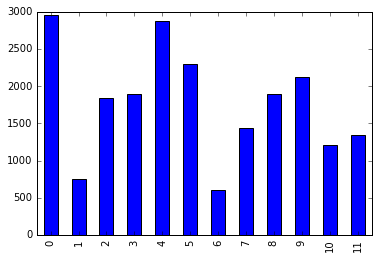

In [250]:
# df.ix[5].plot.bar(); plt.axhline(0, color='k')
airline_details.ix[:,1].plot.bar()

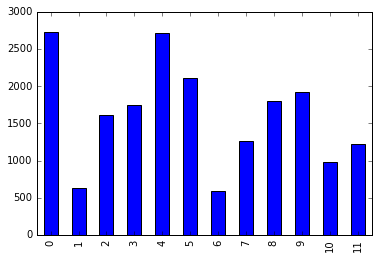

In [251]:
airline_details.ix[:,6].plot.bar()

In [92]:
type(route_delays.iloc[0,2])
route_delays.iloc[0,2]

('ABQ', 'DFW')

In [93]:
counts_and_delays.loc[counts_and_delays['airport_routes'] == ('JFK', 'ORD')]

,UNIQUE_CARRIER,airline_name,airport_routes,city_coutes,distance,average_delay_minutes,flight_counts,delay_var_minutes
293,AA,American Airlines Inc.,"(JFK, ORD)","(New York, NY, Chicago, IL)",740.0,8.748387,155.0,821.371345
1173,B6,JetBlue Airways,"(JFK, ORD)","(New York, NY, Chicago, IL)",740.0,6.442953,298.0,715.224007
1759,DL,Delta Air Lines Inc.,"(JFK, ORD)","(New York, NY, Chicago, IL)",740.0,0.000000,1.0,NaN


In [94]:
len(np.unique(counts_and_delays['airport_routes']))

4273

In [95]:
airline_details.head(2)

,UNIQUE_CARRIER,arr_delay_var,avg_arr_del,avg_dep_del,cancellations,carrier_delay,dep_delay_var,num_flights,tot_arr_del,tot_dep_del,weather_delay,weather_plus_carrier,carrier_delay%,cancellation%,airline_name
0,AA,2226.048309,6.609803,9.751077,1984.0,986109.0,2000.034712,233185.0,1541307.0,2273805.0,186134.0,1172243.0,84.121552,0.850827,American Airlines Inc.
1,AS,646.124408,-2.549315,-0.489591,84.0,68531.0,528.447948,45777.0,-116700.0,-22412.0,4556.0,73087.0,93.766333,0.183498,Alaska Airlines Inc.


In [96]:
airline_details_merge = airline_details[['UNIQUE_CARRIER', 'arr_delay_var', 'carrier_delay%', 'cancellation%']]

In [97]:
export_df = pd.merge(airline_details_merge, counts_and_delays, on='UNIQUE_CARRIER')

In [173]:
export_df.head()

,UNIQUE_CARRIER,arr_delay_var,carrier_delay%,cancellation%,airline_name,airport_routes,city_coutes,distance,average_delay_minutes,flight_counts,delay_var_minutes
0,AA,2226.048309,84.121552,0.850827,American Airlines Inc.,"(ABQ, DFW)","(Albuquerque, NM, Dallas/Fort Worth, TX)",569.0,6.843891,442.0,2874.268092
1,AA,2226.048309,84.121552,0.850827,American Airlines Inc.,"(ALB, CLT)","(Albany, NY, Charlotte, NC)",646.0,0.946154,260.0,26.290526
2,AA,2226.048309,84.121552,0.850827,American Airlines Inc.,"(ANC, DFW)","(Anchorage, AK, Dallas/Fort Worth, TX)",3043.0,5.310345,29.0,157.078818
3,AA,2226.048309,84.121552,0.850827,American Airlines Inc.,"(ANC, LAX)","(Anchorage, AK, Los Angeles, CA)",2345.0,26.517241,29.0,12432.758621
4,AA,2226.048309,84.121552,0.850827,American Airlines Inc.,"(ANC, PHX)","(Anchorage, AK, Phoenix, AZ)",2552.0,1.600000,90.0,60.130337


In [99]:
export_df.to_csv('routes_delays.csv')